# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [12]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy import optimize
from scipy.optimize import fsolve

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

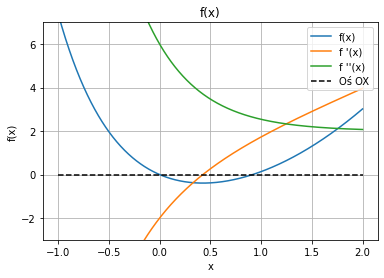

In [13]:
x = np.linspace(-1, 2, 1000)
x_axis = np.zeros(x.shape)
y = main.fun(x)
dy = main.dfun(x)
ddy = main.ddfun(x)
plt.plot(x, y)
plt.plot(x,dy)
plt.plot(x,ddy)

plt.plot(x, x_axis, "--", color="k")
plt.ylim([-3, 7])
plt.xlabel("x")
plt.ylabel('f(x)')
plt.title("f(x)")
plt.legend(("f(x)", "f \'(x)", "f \'\'(x)", "Oś OX"))

plt.grid()
plt.show()


***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


1. Funkcja root

In [14]:
sol1 = optimize.root(main.fun, [0, 1])
print("Funkcja root:")
print(f"Pierwiastki: {sol1.x}")

Funkcja root:
Pierwiastki: [0.         0.91656258]


2. Funkcja fsolve

In [15]:
sol2 = fsolve(main.fun, [0, 1])
print("Funkcja fsolve:")
print(f"Pierwiastki: {sol2}")

Funkcja fsolve:
Pierwiastki: [0.         0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [16]:
print(main.bisection(-0.25, 1, main.fun, 1e-10, 100))
print(main.secant(-0.25, 1, main.fun, 1e-10, 100))
print(main.newton(-0.25, 1, main.fun, main.dfun, main.ddfun, 1e-10, 100))

None
None
None


Dla metod: bisekcji i siecznych nie jest spełniony warunek o różnych znakach funkcji na krańcu przedziału, a dla metody Newtona nie jest spełniony warunek o stałych znakach pierwszej i dugiej pochodnej. Funckje zwracają None. Aby rozwiązać te problemy dzielimy przedziały na mniejsze.

Metoda Bisekcji

In [7]:
sol_bis1, it_bis1 = main.bisection(-0.25, 0.5, main.fun, 1e-10, 100)
sol_bis2, it_bis2 = main.bisection(0.5, 1, main.fun, 1e-10, 100)

Metoda Siecznych

In [8]:
sol_sec1, it_sec1 = main.secant(-0.25, 0.5, main.fun, 1e-10, 100)
sol_sec2, it_sec2 = main.secant(0.5, 1, main.fun, 1e-10, 100)

Metoda Newtona

In [9]:
sol_new1, it_new1 = main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.2, 1e-10, 100)
sol_new2, it_new2 = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, 100)

Badanie dokładności względem zadania 5

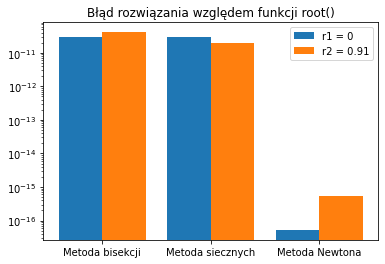

Liczba iteracji
Metoda bisekcji: 32, 30, metoda siecznych: 19,8, metoda Newtona: 5,4


In [10]:
err_bis_s1= np.abs(sol1.x[0]-sol_bis1)
err_bis_s2 = np.abs(sol1.x[1]-sol_bis2)

err_sec_s1 = np.abs(sol1.x[0]-sol_sec1)
err_sec_s2 = np.abs(sol1.x[1]-sol_sec2)

err_new_s1 = np.abs(sol1.x[0] - sol_new1)
err_new_s2 = np.abs(sol1.x[1] - sol_new2)
#tworzenie wykresu słupokowego
height1 = [err_bis_s1, err_sec_s1, err_new_s1]
height2 =  [err_bis_s2, err_sec_s2, err_new_s2]
bars = ('Metoda bisekcji', 'Metoda siecznych', 'Metoda Newtona')
width = 0.4
index = np.arange(len(bars))
plt.bar( index - width/2, height1, width, label='r1 = 0')
plt.bar( index + width/2, height2, width, label='r2 = 0.91')
plt.yscale("log")
plt.title('Błąd rozwiązania względem funkcji root()')
plt.xticks(index, bars)
plt.legend()

plt.show()

print("Liczba iteracji")
print(f"Metoda bisekcji: {it_bis1}, {it_bis2}, metoda siecznych: {it_sec1},{it_sec2}, metoda Newtona: {it_new1},{it_new2}")

1. Metoda Newtona osiąga najmniejszą wartość błędu, który wynosi około 1e-16, oraz wykonuje najmniejszą liczbę iteracji - zatem wypada zdecydowanie najlepiej na tle pozostałych.
2. Metoda Bisekcji i Metoda Siecznych mają podobny błąd na poziomie 1e-10.  może wynikać z ich powolnej zbieżności.
3. Wadą bisekcji jest to, że ilość wykonań pętli zależy od tego, w którym miejscu przedziału znajduje się pierwiastek - co może tłumaczyć najgorszy wynik.

Analizy czasowe

572 ns ± 109 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.47 times longer than the fastest. This could mean that an intermediate result is being cached.
672 ns ± 277 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
562 ns ± 94.6 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
660 ns ± 98.1 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
690 ns ± 140 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
781 ns ± 327 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
587 ns ± 78.7 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
564 ns ± 83.1 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
563 ns ± 116 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
573 ns ± 105 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


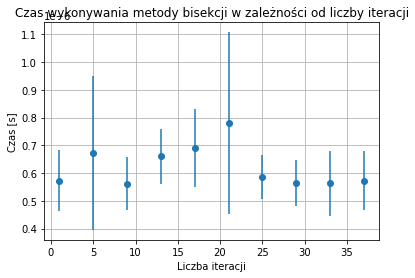

In [17]:
err = []
time = []
x = np.arange(1, 40, 4)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.bisection(-0.25, 0.5, main.fun, 1e-10, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)
    
plt.errorbar(x, time, yerr=err, marker="o", linestyle='None')
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody bisekcji w zależności od liczby iteracji")
plt.grid()
plt.show()

The slowest run took 5.50 times longer than the fastest. This could mean that an intermediate result is being cached.
696 ns ± 301 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
594 ns ± 88.9 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
970 ns ± 385 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
685 ns ± 272 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 9.05 times longer than the fastest. This could mean that an intermediate result is being cached.
662 ns ± 472 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.58 times longer than the fastest. This could mean that an intermediate result is being cached.
834 ns ± 436 ns per loop (mean ± std. dev. of 100

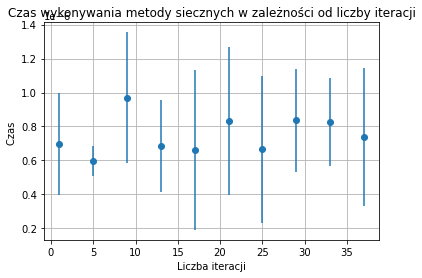

In [19]:
err = []
time = []
x = np.arange(1, 40, 4)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.secant(-0.25, 0.5, main.fun, 1e-10, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)
    
plt.errorbar(x, time, yerr=err, marker="o", linestyle='None')
plt.ylabel("Czas ")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody siecznych w zależności od liczby iteracji")
plt.grid()
plt.show()

723 ns ± 170 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
859 ns ± 172 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
765 ns ± 53.5 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
925 ns ± 209 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 6.02 times longer than the fastest. This could mean that an intermediate result is being cached.
878 ns ± 398 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
727 ns ± 116 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.16 times longer than the fastest. This could mean that an intermediate result is being cached.
864 ns ± 349 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 11.19 times longer than the fastest. This could mean that an intermediate result is being cached.
880 ns ± 655 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
647 ns ± 111 ns per loop (mean ± std. dev. of 100 runs, 100 loops ea

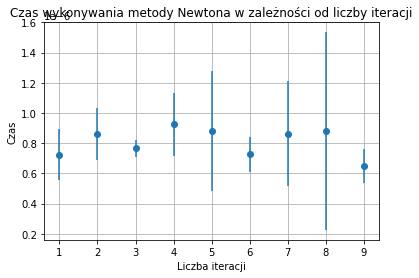

In [20]:
err = []
time = []
x = np.arange(1, 10, 1)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.2, 1e-10, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)
    
plt.errorbar(x, time, yerr=err, marker="o", linestyle='None')
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody Newtona w zależności od liczby iteracji")
plt.grid()
plt.show()

Wszystkie 3 metody wykonują się w podobnym czasie choć można powiedzieć, że najszybsza jest Metoda Biskecji, potem jest Metoda Siecznych, a Najwolniej wykonuje się metoda Newtona. Jendakże różnice te są bardzo nie wielkie i wszystkie metody wykonują się zazwyczaj w czasie kilkuset nanosekund.